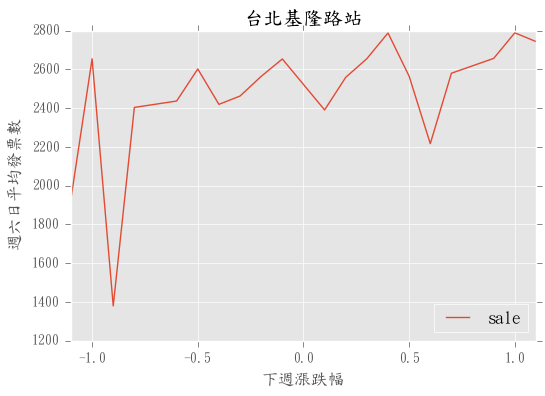

Coefficient:[ 259.64211908]
Intercept:2474.199612457411
0.298892868532


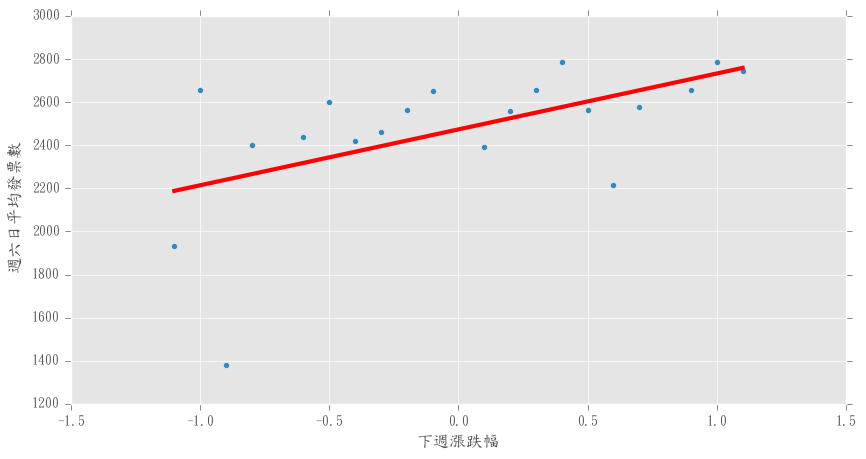

In [9]:
from sklearn.linear_model import LinearRegression
#import plotly.plotly as py
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date,timedelta
import matplotlib
plt.close('all')
matplotlib.style.use('ggplot')
conn = sqlite3.connect('hackson.db')
#a=pd.read_sql('SELECT substr(列帳日期,1,3)+1911 as yyyy ,substr(列帳日期,4,2) as mm,substr(列帳日期,6,2)as dd FROM "12加油站每日銷售發票張數V3UTF8";',conn)
sqlstr="SELECT avg(主油品) as sale ,nextdifference FROM 加油站每日銷售發票張數 a , 加油站服務資訊utf821 b where a.站代碼=b.站代號 and  站代號='D2144' \
    and weekno>5 group by  nextdifference  order by nextdifference ;"
pdoil=pd.read_sql(sqlstr,conn)
pdoil.plot(x='nextdifference',y='sale')
plt.xlabel('下週漲跌幅')
plt.ylabel('週六日平均發票數')
plt.title("台北基隆路站")
plt.rcParams['font.family']='DFKai-sb'
#layout=Layout(title="基隆路站")
#coding:utf-8


plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

plt.rcParams['axes.unicode_minus']=False #用来正常显示负号#有中文出现的情况，需要u'内容'

plt.rcParams
plt.show()
from sklearn.linear_model import LinearRegression
y= pdoil['sale']
X = pdoil[['nextdifference']]
regr = LinearRegression()
regr.fit(X,y)

print('Coefficient:{}'.format(regr.coef_) )
print('Intercept:{}'.format(regr.intercept_) )
print(regr.score(X,y))

pdoil[['sale', 'nextdifference']].plot(kind='scatter', x = 'nextdifference', y = 'sale', figsize=[10,5])
plt.xlabel('下週漲跌幅')
plt.ylabel('週六日平均發票數')

plt.plot(X, regr.predict(X), linewidth = 3, color = "red")
